In [1]:
# import library
import pandas as pd
import re
import sqlite3 as sq
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv('docs/DATA/train_preprocess.tsv.txt', sep='\t', names=['Tweet','Label'])
df

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [3]:
# sortir label tweet
sorted(df['Label'].unique())

['negative', 'neutral', 'positive']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   11000 non-null  object
 1   Label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [5]:
df.shape

(11000, 2)

In [6]:
# mengecek missing values
df.isna().sum()

Tweet    0
Label    0
dtype: int64

In [7]:
# mengecek data duplikat
df.duplicated().sum()

67

In [8]:
# menghapus data yang duplikat
df = df.drop_duplicates()

In [9]:
# mengecek kembali data duplikat
df.duplicated().sum()

0

In [10]:
df.shape

(10933, 2)

In [11]:
# menghitung value dari label
df.Label.value_counts()

Label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

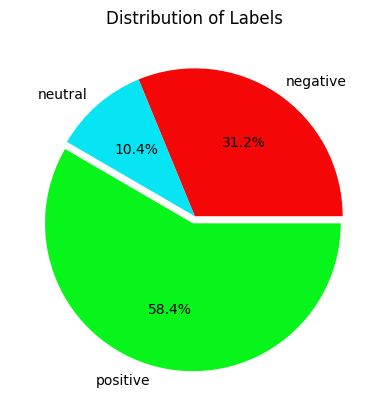

In [12]:
# data visualisasi
explode = [0, 0, 0.05]
presentase_sentiment = df.groupby("Label").Label.count()
presentase_sentiment.plot(kind = 'pie', autopct = '%1.1f%%', colors = ['#f50707', '#07e5f5', '#07f51b'], explode = explode)
plt.title('Distribution of Labels')
plt.axis('off')
plt.show()

In [13]:
# membuat kolom baru total word
df['Total Word'] = df['Tweet'].apply(lambda word: len(word.split()))
df

C:\Users\Reza Fakhrurrozi\AppData\Local\Temp\ipykernel_24408\48601816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Word'] = df['Tweet'].apply(lambda word: len(word.split()))


,Tweet,Label,Total Word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,66
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,17
2,lokasi strategis di jalan sumatera bandung . t...,positive,33
3,betapa bahagia nya diri ini saat unboxing pake...,positive,17
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,38
...,...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral,8
10994,tidak bosan,positive,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,26
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,13


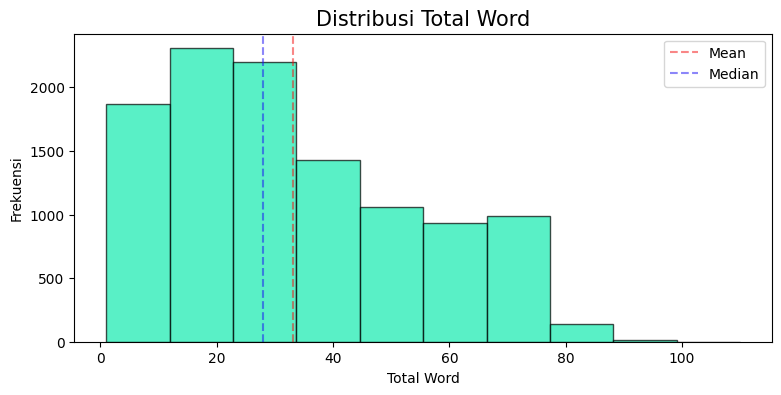

In [14]:
# data visualisasi
# palet warna
color = '#13ebaf'

# histogram
fig = plt.figure(figsize=(9, 4))
plt.hist(df['Total Word'], color=color, edgecolor='black', alpha=0.7)

# garis vertikal mean dan median
plt.axvline(x=df['Total Word'].mean(), ls='--', color='#f50f0f', alpha=0.5, label='Mean')
plt.axvline(x=df['Total Word'].median(), ls='--', color='#1a0ff5', alpha=0.5, label='Median')

# judul dan label
plt.title('Distribusi Total Word', size=15)
plt.xlabel('Total Word')
plt.ylabel('Frekuensi')

# tampilkan legend
plt.legend()

# tampilkan histogram
plt.show()

In [15]:
df['Total Word'].mean()

33.060550626543495

In [16]:
df["Total Word"].median()

28.0

In [17]:
# menghapus kolom total word
df = df.drop('Total Word', axis=1)

In [18]:
# mengubah ke huruf kecil
def lowercase(s):
    return s.lower()

In [19]:
# menghapus emoticon, tanda baca, link menggunakan regex
def punctuation(s):
    s = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', s) #menghapus https dan http
    s = re.sub('<.*?>', ' ', s) #mengganti karakter html dengan tanda petik
    s = re.sub('[^0-9a-zA-Z]+', ' ', s) #menghilangkan semua karakter yang bukan huruf atau angka dan menggantinya dengan spasi.
    s = re.sub('\n',' ',s) #mengganti line baru dengan spasi
    s = re.sub(r':', ' ', s) #menggantikan karakter : dengan spasi 
    s = re.sub('gue','saya', s) # Mengganti kata "gue" dengan kata "saya"
    s = re.sub(r'\b[a-zA-Z]\b', ' ', s) #menghapus single char
    s = ' '.join(s.split()) #memisahkan dan menggabungkan kata
    s = s.strip() #menghilangkan whitespace di awal dan di akhir teks
    s = re.sub(r'pic.twitter.com.[\w]+', '', s) #menghapus link picture
    s = re.sub(r'\buser\b',' ', s) #menghapus kata 'user'
    s = re.sub(r'\brt\b',' ', s) #menghapus awalan rt
    s = re.sub('RT',' ', s) #menghapus RT simbol
    s = re.sub(r'‚Ä¶', '', s)
    
    return s

In [20]:
# membuat database
conn = sq.connect('database_pl.db')

In [25]:
# import kamusalay
df_kamusalay = pd.read_csv('docs/DATA/new_kamusalay.csv', encoding='latin-1', names=['alay','normal'])

In [22]:
df_kamusalay.to_sql('kamusalay', conn, if_exists='replace', index=False)
df_kamusalay = pd.DataFrame(df_kamusalay)
df_kamusalay

,alay,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [23]:
conn = sq.connect('database_pl.db', check_same_thread= False)
df_kamusalay = pd.read_sql_query('SELECT * FROM kamusalay', conn)

In [24]:
kamusalay = dict(zip(df_kamusalay['alay'], df_kamusalay['normal']))
def alay_to_normal(s):
    for word in kamusalay:
        return ' '.join([kamusalay[word] if word in kamusalay else word for word in s.split(' ')])

In [25]:
# meng-copy dataset

data = df.copy()
data

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10993,f - demokrat dorong upaya kemandirian energi n...,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [26]:
# membuat text cleansing function

def cleansing(sent):
    string = lowercase(sent)
    string = punctuation(string)
    string = alay_to_normal(string)

    return string

In [27]:
# apply cleansing function pada dataset
data['Tweet'] = data['Tweet'].apply(cleansing)
data

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,aduh jadi mahasiswa jangan sombong dong kasih ...,negative
...,...,...
10993,demokrat dorong upaya kemandirian energi nasional,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [28]:
# perbandingan tweet lama and tweet baru

print('Old Tweet: {}'.format(df['Tweet'].iloc[5]))
print('\t')
print('New Tweet: {}'.format(data['Tweet'].iloc[5]))

Old Tweet: makanan beragam , harga makanan di food stall akan ditambahkan 10 % lagi di kasir , suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk .
	
New Tweet: makanan beragam harga makanan di food stall akan ditambahkan 10 lagi di kasir suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk


In [29]:
# memasukkan cleaned data ke database

data.to_sql('data', conn, if_exists='replace', index=False)
data=pd.DataFrame(data)
data

,Tweet,Label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatra bandung temp...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,aduh jadi mahasiswa jangan sombong dong kasih ...,negative
...,...,...
10993,demokrat dorong upaya kemandirian energi nasional,neutral
10994,tidak bosan,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [30]:
# Close the database

conn.commit()
conn.close()